In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [2]:

data = pd.read_json(os.getcwd()+"\cancer.json")
headers = ['Sample code number','Clump Thikness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
data.columns = headers
data=data.set_index('Sample code number')
data.head()

,Clump Thikness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
data.replace("?", np.nan, inplace = True)
print("True indicate the number of missing value\n")
missing_data = data.isnull()
for column in missing_data.columns.values.tolist():
  print(missing_data[column].value_counts())


print("\n\nthe number of missing value:")
print(data.isnull().sum())

True indicate the number of missing value

False    699
Name: Clump Thikness, dtype: int64
False    699
Name: Uniformity of Cell Size, dtype: int64
False    699
Name: Uniformity of Cell Shape, dtype: int64
False    699
Name: Marginal Adhesion, dtype: int64
False    699
Name: Single Epithelial Cell Size, dtype: int64
False    683
True      16
Name: Bare Nuclei, dtype: int64
False    699
Name: Bland Chromatin, dtype: int64
False    699
Name: Normal Nucleoli, dtype: int64
False    699
Name: Mitoses, dtype: int64
False    699
Name: Class, dtype: int64


the number of missing value:
Clump Thikness                  0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thikness               699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  683 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 60.1+ KB


In [5]:
data.describe(include='all')

,Clump Thikness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,683,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [6]:
#replace the missing value by the most frequence in the same class
frequency_melignant = data.loc[(data["Class"]==4)]["Bare Nuclei"].value_counts().idxmax()
frequency_benign = data.loc[(data["Class"]==2)]["Bare Nuclei"].value_counts().idxmax()

data["Bare Nuclei"].fillna(pd.Series(np.where(data["Class"] == 4,frequency_melignant,frequency_benign),
                                     index=data.index),inplace=True)


In [7]:
##### change "Bare Nuclei" type from object to int
data[["Bare Nuclei"]] = data[["Bare Nuclei"]].astype("int")
data["Class"] = data["Class"].map({2:0,4:1})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thikness               699 non-null    int64
 1   Uniformity of Cell Size      699 non-null    int64
 2   Uniformity of Cell Shape     699 non-null    int64
 3   Marginal Adhesion            699 non-null    int64
 4   Single Epithelial Cell Size  699 non-null    int64
 5   Bare Nuclei                  699 non-null    int32
 6   Bland Chromatin              699 non-null    int64
 7   Normal Nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int32(1), int64(9)
memory usage: 57.3 KB


In [8]:
data.head()

,Clump Thikness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,0
1002945,5,4,4,5,7,10,3,2,1,0
1015425,3,1,1,1,2,2,3,1,1,0
1016277,6,8,8,1,3,4,3,7,1,0
1017023,4,1,1,3,2,1,3,1,1,0


In [9]:
data["Bare Nuclei"].value_counts()

1     416
10    134
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [10]:
data.tail()

,Clump Thikness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,,,,,,,,,,
776715,3,1,1,1,3,2,1,1,1,0
841769,2,1,1,1,2,1,1,1,1,0
888820,5,10,10,3,7,3,8,10,2,1
897471,4,8,6,4,3,4,10,6,1,1
897471,4,8,8,5,4,5,10,4,1,1


In [11]:
#all data is in the same range and it is small and discrete 

In [12]:
data2 = data[data.duplicated()]
data2 = data2.drop_duplicates()
data2.shape

(46, 10)

In [13]:
#Exploratory data analysis

Text(0.5, 1.0, 'Class distribution')

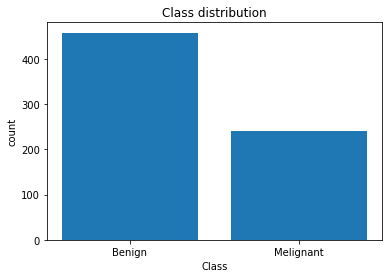

In [14]:
class_names = ["Benign","Melignant"]
plt.bar(class_names,data["Class"].value_counts())

plt.xlabel("Class")
plt.ylabel("count")
plt.title("Class distribution")

array([[<AxesSubplot:title={'center':'Clump Thikness'}>,
        <AxesSubplot:title={'center':'Uniformity of Cell Size'}>,
        <AxesSubplot:title={'center':'Uniformity of Cell Shape'}>],
       [<AxesSubplot:title={'center':'Marginal Adhesion'}>,
        <AxesSubplot:title={'center':'Single Epithelial Cell Size'}>,
        <AxesSubplot:title={'center':'Bare Nuclei'}>],
       [<AxesSubplot:title={'center':'Bland Chromatin'}>,
        <AxesSubplot:title={'center':'Normal Nucleoli'}>,
        <AxesSubplot:title={'center':'Mitoses'}>],
       [<AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

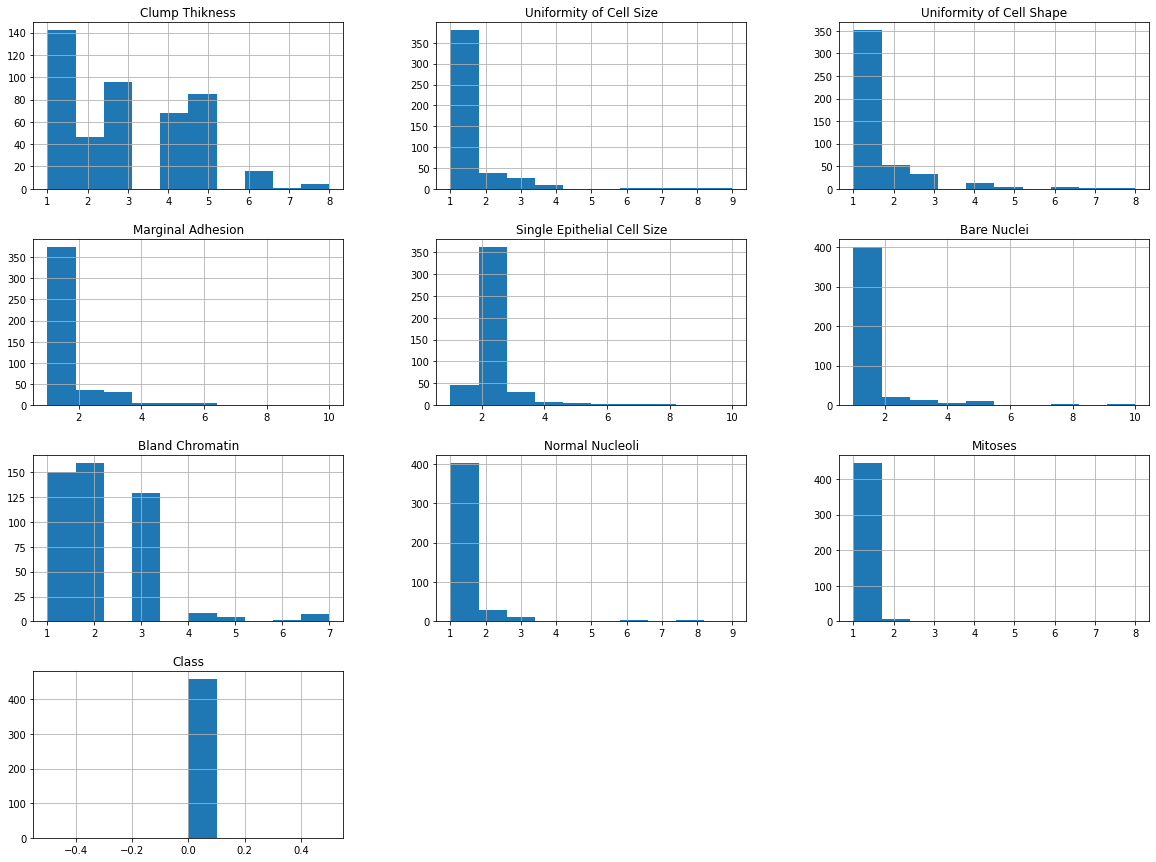

In [15]:
data[data["Class"] == 0].hist(figsize = (20,15))


array([[<AxesSubplot:title={'center':'Clump Thikness'}>,
        <AxesSubplot:title={'center':'Uniformity of Cell Size'}>,
        <AxesSubplot:title={'center':'Uniformity of Cell Shape'}>],
       [<AxesSubplot:title={'center':'Marginal Adhesion'}>,
        <AxesSubplot:title={'center':'Single Epithelial Cell Size'}>,
        <AxesSubplot:title={'center':'Bare Nuclei'}>],
       [<AxesSubplot:title={'center':'Bland Chromatin'}>,
        <AxesSubplot:title={'center':'Normal Nucleoli'}>,
        <AxesSubplot:title={'center':'Mitoses'}>],
       [<AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

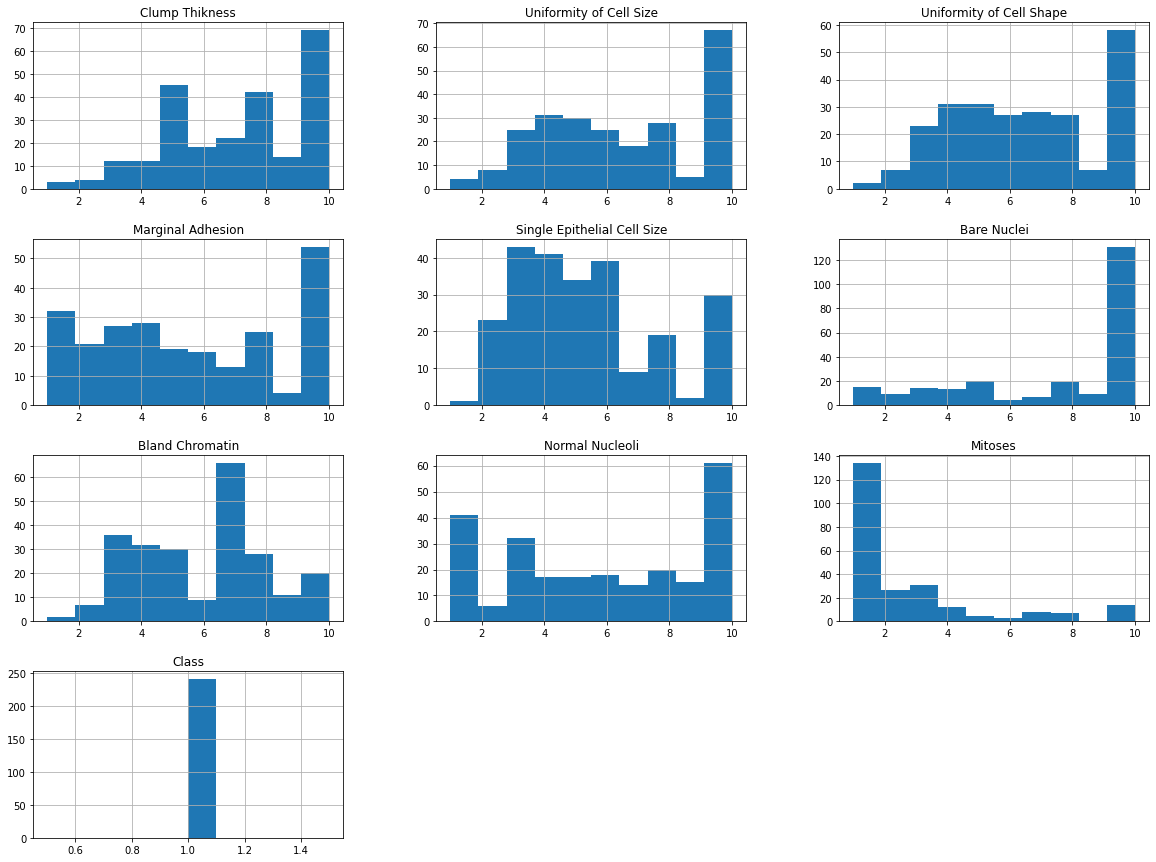

In [16]:
data[data["Class"] == 1].hist(figsize = (20,15))

In [17]:
data.corr()

,Clump Thikness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thikness,1.000000,0.644913,0.654589,0.486356,0.521816,0.596724,0.558428,0.535835,0.350034,0.716001
Uniformity of Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.690648,0.755721,0.722865,0.458693,0.817904
Uniformity of Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.712565,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.659875,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.577524,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.596724,0.690648,0.712565,0.659875,0.577524,1.000000,0.680485,0.580969,0.338621,0.825536
Bland Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.680485,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.580969,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.338621,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.825536,0.756616,0.712244,0.423170,1.000000


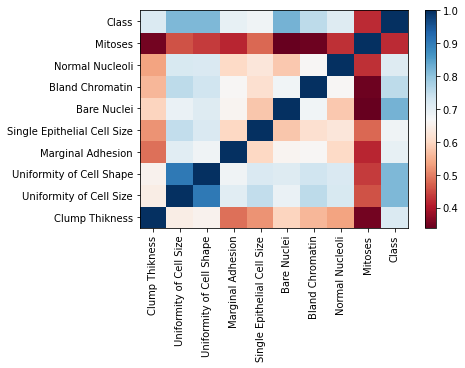

In [18]:
fig, ax = plt.subplots()
im = ax.pcolor(data.corr(), cmap='RdBu')

#label names
row_labels = data.corr().columns.values.tolist()
col_labels = data.corr().columns.values.tolist()

#move ticks and labels to the center
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()
#we see the highly correlation between uniformity size and uniformity shape so we are going to use only one of them
#because features with high correlation doesn't provide a lot of information

<AxesSubplot:ylabel='Density'>

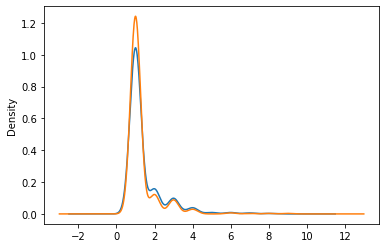

In [19]:
#we see that the uniformity of cell shape and the uniformity of sell size are highly correlated let's check their 
# distribution     
#first we plot the density of distribution of this features when the tumor is benign
data[data["Class"]==0]["Uniformity of Cell Shape"].plot.kde()
data[data["Class"]==0]["Uniformity of Cell Size"].plot.kde()

<AxesSubplot:ylabel='Density'>

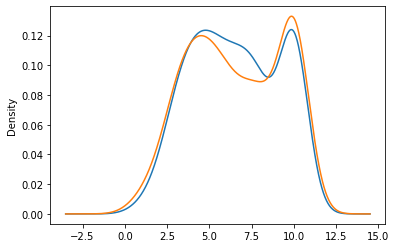

In [20]:
#now we plot the density of distribution of this features when the tumor is melignant
data[data["Class"]==1]["Uniformity of Cell Shape"].plot.kde()
data[data["Class"]==1]["Uniformity of Cell Size"].plot.kde()

<AxesSubplot:>

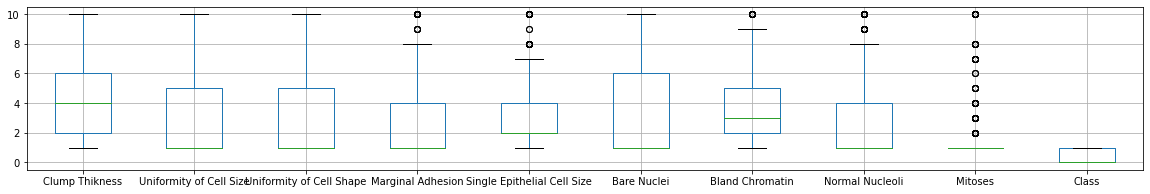

In [21]:
data.boxplot(figsize=(20,3))
#we have noticed from the box plot and the density distribution plot that 
#the uniformity of cell shape and the uniformity of sell size they have the same distribution and they are highly
#correlated so we can drop one of theme because they share the same information and he don't add a big differnce.

In [22]:
data.drop(columns=["Uniformity of Cell Size"],inplace = True)

<AxesSubplot:ylabel='Density'>

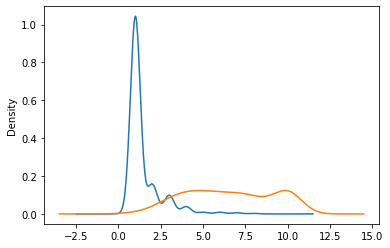

In [23]:
data[data["Class"]==0]["Uniformity of Cell Shape"].plot.kde()
data[data["Class"]== 1]["Uniformity of Cell Shape"].plot.kde()

<AxesSubplot:ylabel='Density'>

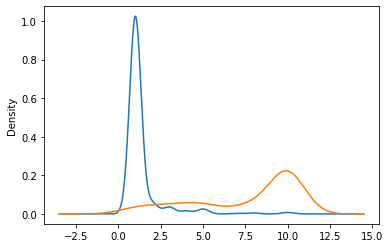

In [24]:
data[data["Class"]==0]["Bare Nuclei"].plot.kde()
data[data["Class"]==1]["Bare Nuclei"].plot.kde()

<AxesSubplot:ylabel='Density'>

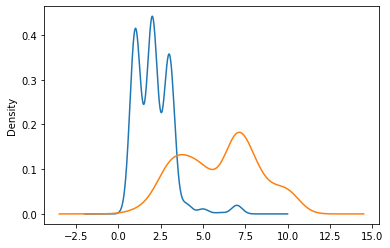

In [25]:
data[data["Class"]==0]["Bland Chromatin"].plot.kde()
data[data["Class"]==1]["Bland Chromatin"].plot.kde()

<AxesSubplot:ylabel='Density'>

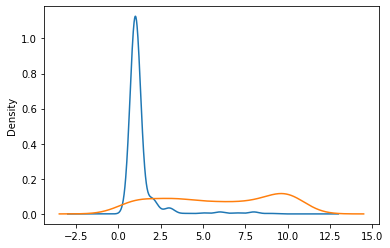

In [26]:
data[data["Class"]==0]["Normal Nucleoli"].plot.kde()
data[data["Class"]==1]["Normal Nucleoli"].plot.kde()

<AxesSubplot:ylabel='Density'>

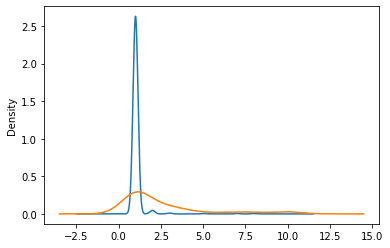

In [27]:
data[data["Class"]==0]["Mitoses"].plot.kde()
data[data["Class"]==1]["Mitoses"].plot.kde()

In [32]:
#handle outliers 
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

iqr = q3 - q1

lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print(lower_bound)
print(upper_bound)

Clump Thikness                -4.0
Uniformity of Cell Shape      -5.0
Marginal Adhesion             -3.5
Single Epithelial Cell Size   -1.0
Bare Nuclei                   -6.5
Bland Chromatin               -2.5
Normal Nucleoli               -3.5
Mitoses                        1.0
Class                         -1.5
dtype: float64
Clump Thikness                 12.0
Uniformity of Cell Shape       11.0
Marginal Adhesion               8.5
Single Epithelial Cell Size     7.0
Bare Nuclei                    13.5
Bland Chromatin                 9.5
Normal Nucleoli                 8.5
Mitoses                         1.0
Class                           2.5
dtype: float64


In [33]:
#i al going to try remove outliers from data
# after that i will studyr the corrrelation between the features and target to seee who impact the most
from scipy import stats
data_grouped = data[["Bare Nuclei","Mitoses","Class"]].groupby("Class")
data_grouped.get_group(0)["Bare Nuclei"]

Sample code number
1000025     1
1002945    10
1015425     2
1016277     4
1017023     1
           ..
654546      1
714039      1
763235      1
776715      2
841769      1
Name: Bare Nuclei, Length: 458, dtype: int32

In [34]:
data.to_csv("clean_data.csv")

In [35]:
# now we start implementing the decision tree algorithm


In [36]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors,tree
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,KFold
from sklearn.model_selection import cross_val_predict,GridSearchCV,learning_curve

In [37]:
data = pd.read_csv("clean_data.csv")
data.set_index("Sample code number",inplace = True)
data.head()

,Clump Thikness,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,,,,,,,,,
1000025,5,1,1,2,1,3,1,1,0
1002945,5,4,5,7,10,3,2,1,0
1015425,3,1,1,2,2,3,1,1,0
1016277,6,8,1,3,4,3,7,1,0
1017023,4,1,3,2,1,3,1,1,0


In [38]:
#this is used when we picked the model that provide the best performance to train and test it 67% for training 
#and 33 %  for testing
data = sk.utils.shuffle(data,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = "Class"), data["Class"]
                                                    , test_size=0.2, random_state=42,shuffle = True)

In [39]:
y_test.value_counts()

0    91
1    49
Name: Class, dtype: int64

In [40]:
#initialize the number of fold used to test the performance of model
cv = StratifiedKFold(n_splits = 4)

In [41]:
# grid search for decision_tree , knn , mlp with one hidden layer , mlp with two hidden layer
# this meight take a time 
# we didn't use a learning rates small than 1e-3 because the model won't converge even for 1000 iteration
# because we haven't enough data for train the neural nets with a considirable depth and number of units
# and as we know the more data the more model performe well

metric = ["precision","recall","f1","accuracy"]
df_tree,df_knn,df_mlp,df_mlp_2h = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
first_met = True
for met in metric:
    params_tree = {
    "criterion":["gini","entropy"],
    "max_depth":[5,10,15,20,25,None]
                    }
    gridsearch_tree = GridSearchCV(tree.DecisionTreeClassifier(),params_tree,scoring = met,cv=cv)
    gridsearch_tree.fit(X_train,y_train)
    
    
    params_knn = {
    "n_neighbors":[3,5,7,9],
    "weights":["distance","uniform"]
                    }
    gridsearch_knn = GridSearchCV(neighbors.KNeighborsClassifier(),params_knn,scoring = met,cv=cv)
    gridsearch_knn.fit(X_train,y_train)
    
    
    
    params_mlp = {
    "solver" : ["sgd","adam"],
    "alpha" : [1e-3,1e-4],
    "learning_rate_init" : [1e-3,1e-3*5],
    "hidden_layer_sizes" : [(15,),(45,),(25,10)],
    }
    
    gridsearch_mlp = GridSearchCV(MLPClassifier(max_iter = 1000),params_mlp,scoring = met,cv=cv)
    gridsearch_mlp.fit(X_train,y_train)
    
    
    params_svm = {
    "kernel":["linear","poly","rbf"],
    "C":[0.1,1,10]
                }
    
    gridsearch_svm = GridSearchCV(SVC(),params_svm,scoring = met,cv=cv)
    gridsearch_svm.fit(X_train,y_train)
    
    if first_met:
        df_tree = pd.DataFrame(gridsearch_tree.cv_results_)[["param_criterion","param_max_depth","mean_test_score"]]
        df_tree.rename(columns={"mean_test_score":met},inplace=True)
        
        df_knn = pd.DataFrame(gridsearch_knn.cv_results_)[["param_weights","param_n_neighbors","mean_test_score"]]
        df_knn.rename(columns={"mean_test_score":met},inplace=True)
        
        df_mlp = pd.DataFrame(gridsearch_mlp.cv_results_)[["param_solver","param_learning_rate_init","param_alpha","param_hidden_layer_sizes","mean_test_score"]]
        df_mlp.rename(columns={"mean_test_score":met},inplace=True)
        
        
        df_svm = pd.DataFrame(gridsearch_svm.cv_results_)[["param_kernel","param_C","mean_test_score"]]
        df_svm.rename(columns={"mean_test_score":met},inplace=True)
        
        first_met = False
    else: 
        df_tree[met] = pd.DataFrame(gridsearch_tree.cv_results_)["mean_test_score"]
        df_knn[met] = pd.DataFrame(gridsearch_knn.cv_results_)["mean_test_score"]
        
        df_mlp[met] = pd.DataFrame(gridsearch_mlp.cv_results_)["mean_test_score"]    
        
        df_svm[met] = pd.DataFrame(gridsearch_svm.cv_results_)["mean_test_score"]

C:\Users\LENOVO THINKPAD X260\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO THINKPAD X260\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO THINKPAD X260\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO THINKPAD X260\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reac

In [42]:
df_tree.to_csv("tree.csv")
df_tree

,param_criterion,param_max_depth,precision,recall,f1,accuracy
0,gini,5,0.930797,0.895833,0.909550,0.942780
1,gini,10,0.926776,0.911458,0.914582,0.932053
2,gini,15,0.930708,0.901042,0.914972,0.946377
3,gini,20,0.930949,0.921875,0.912014,0.940994
4,gini,25,0.936959,0.916667,0.921297,0.941020
5,gini,None,0.931481,0.880208,0.926182,0.944579
6,entropy,5,0.941583,0.890625,0.919269,0.946364
7,entropy,10,0.952710,0.906250,0.928136,0.953546
8,entropy,15,0.947587,0.906250,0.916428,0.946364
9,entropy,20,0.952702,0.906250,0.933123,0.955319


In [369]:
df_knn.to_csv("knn.csv")
df_knn

,param_weights,param_n_neighbors,precision,recall,f1,accuracy
0,distance,3,0.951209,0.954218,0.952298,0.967096
1,uniform,3,0.950935,0.950103,0.950206,0.965665
2,distance,5,0.943945,0.950051,0.946289,0.962804
3,uniform,5,0.943945,0.950051,0.946289,0.962804
4,distance,7,0.947531,0.950051,0.948165,0.964235
5,uniform,7,0.947531,0.950051,0.948165,0.964235
6,distance,9,0.944024,0.954270,0.948630,0.964235
7,uniform,9,0.944024,0.954270,0.948630,0.964235


In [43]:
df_svm.to_csv("svm.csv")
df_svm

,param_kernel,param_C,precision,recall,f1,accuracy
0,linear,0.1,0.953098,0.953125,0.952957,0.967831
1,poly,0.1,0.952626,0.942708,0.947298,0.964260
2,rbf,0.1,0.939175,0.963542,0.951134,0.966046
3,linear,1,0.958390,0.953125,0.955416,0.969617
4,poly,1,0.962847,0.937500,0.949704,0.966046
5,rbf,1,0.948971,0.968750,0.958708,0.971403
6,linear,10,0.958071,0.947917,0.952677,0.967831
7,poly,10,0.955334,0.880208,0.915422,0.944579
8,rbf,10,0.949125,0.947917,0.948052,0.964247


In [44]:
df_mlp.to_csv("mlp.csv")
df_mlp[(df_mlp["recall"]>0.95) | (df_mlp["precision"]>0.95)]

,param_solver,param_learning_rate_init,param_alpha,param_hidden_layer_sizes,precision,recall,f1,accuracy
0,sgd,0.001,0.001,"(15,)",0.958001,0.921875,0.931063,0.953533
1,adam,0.001,0.001,"(15,)",0.962823,0.953125,0.941521,0.967831
2,sgd,0.005,0.001,"(15,)",0.963287,0.947917,0.944060,0.969630
3,adam,0.005,0.001,"(15,)",0.953430,0.937500,0.954954,0.966059
4,sgd,0.001,0.001,"(45,)",0.951219,0.916667,0.946900,0.962461
5,adam,0.001,0.001,"(45,)",0.956869,0.953125,0.966051,0.966059
6,sgd,0.005,0.001,"(45,)",0.957413,0.916667,0.941485,0.967831
9,adam,0.001,0.001,"(25, 10)",0.951957,0.953125,0.949052,0.964260
10,sgd,0.005,0.001,"(25, 10)",0.958213,0.953125,0.960566,0.967793
12,sgd,0.001,0.0001,"(15,)",0.951630,0.937500,0.944217,0.969617


we have done the parametres selection based on the best combination between the recall and the precision 
We were biased on the recall but without lossing a lot of precision because recall is the most important factor
we are dealing with cancer patient so we have to ensure mnimize the false negative errors

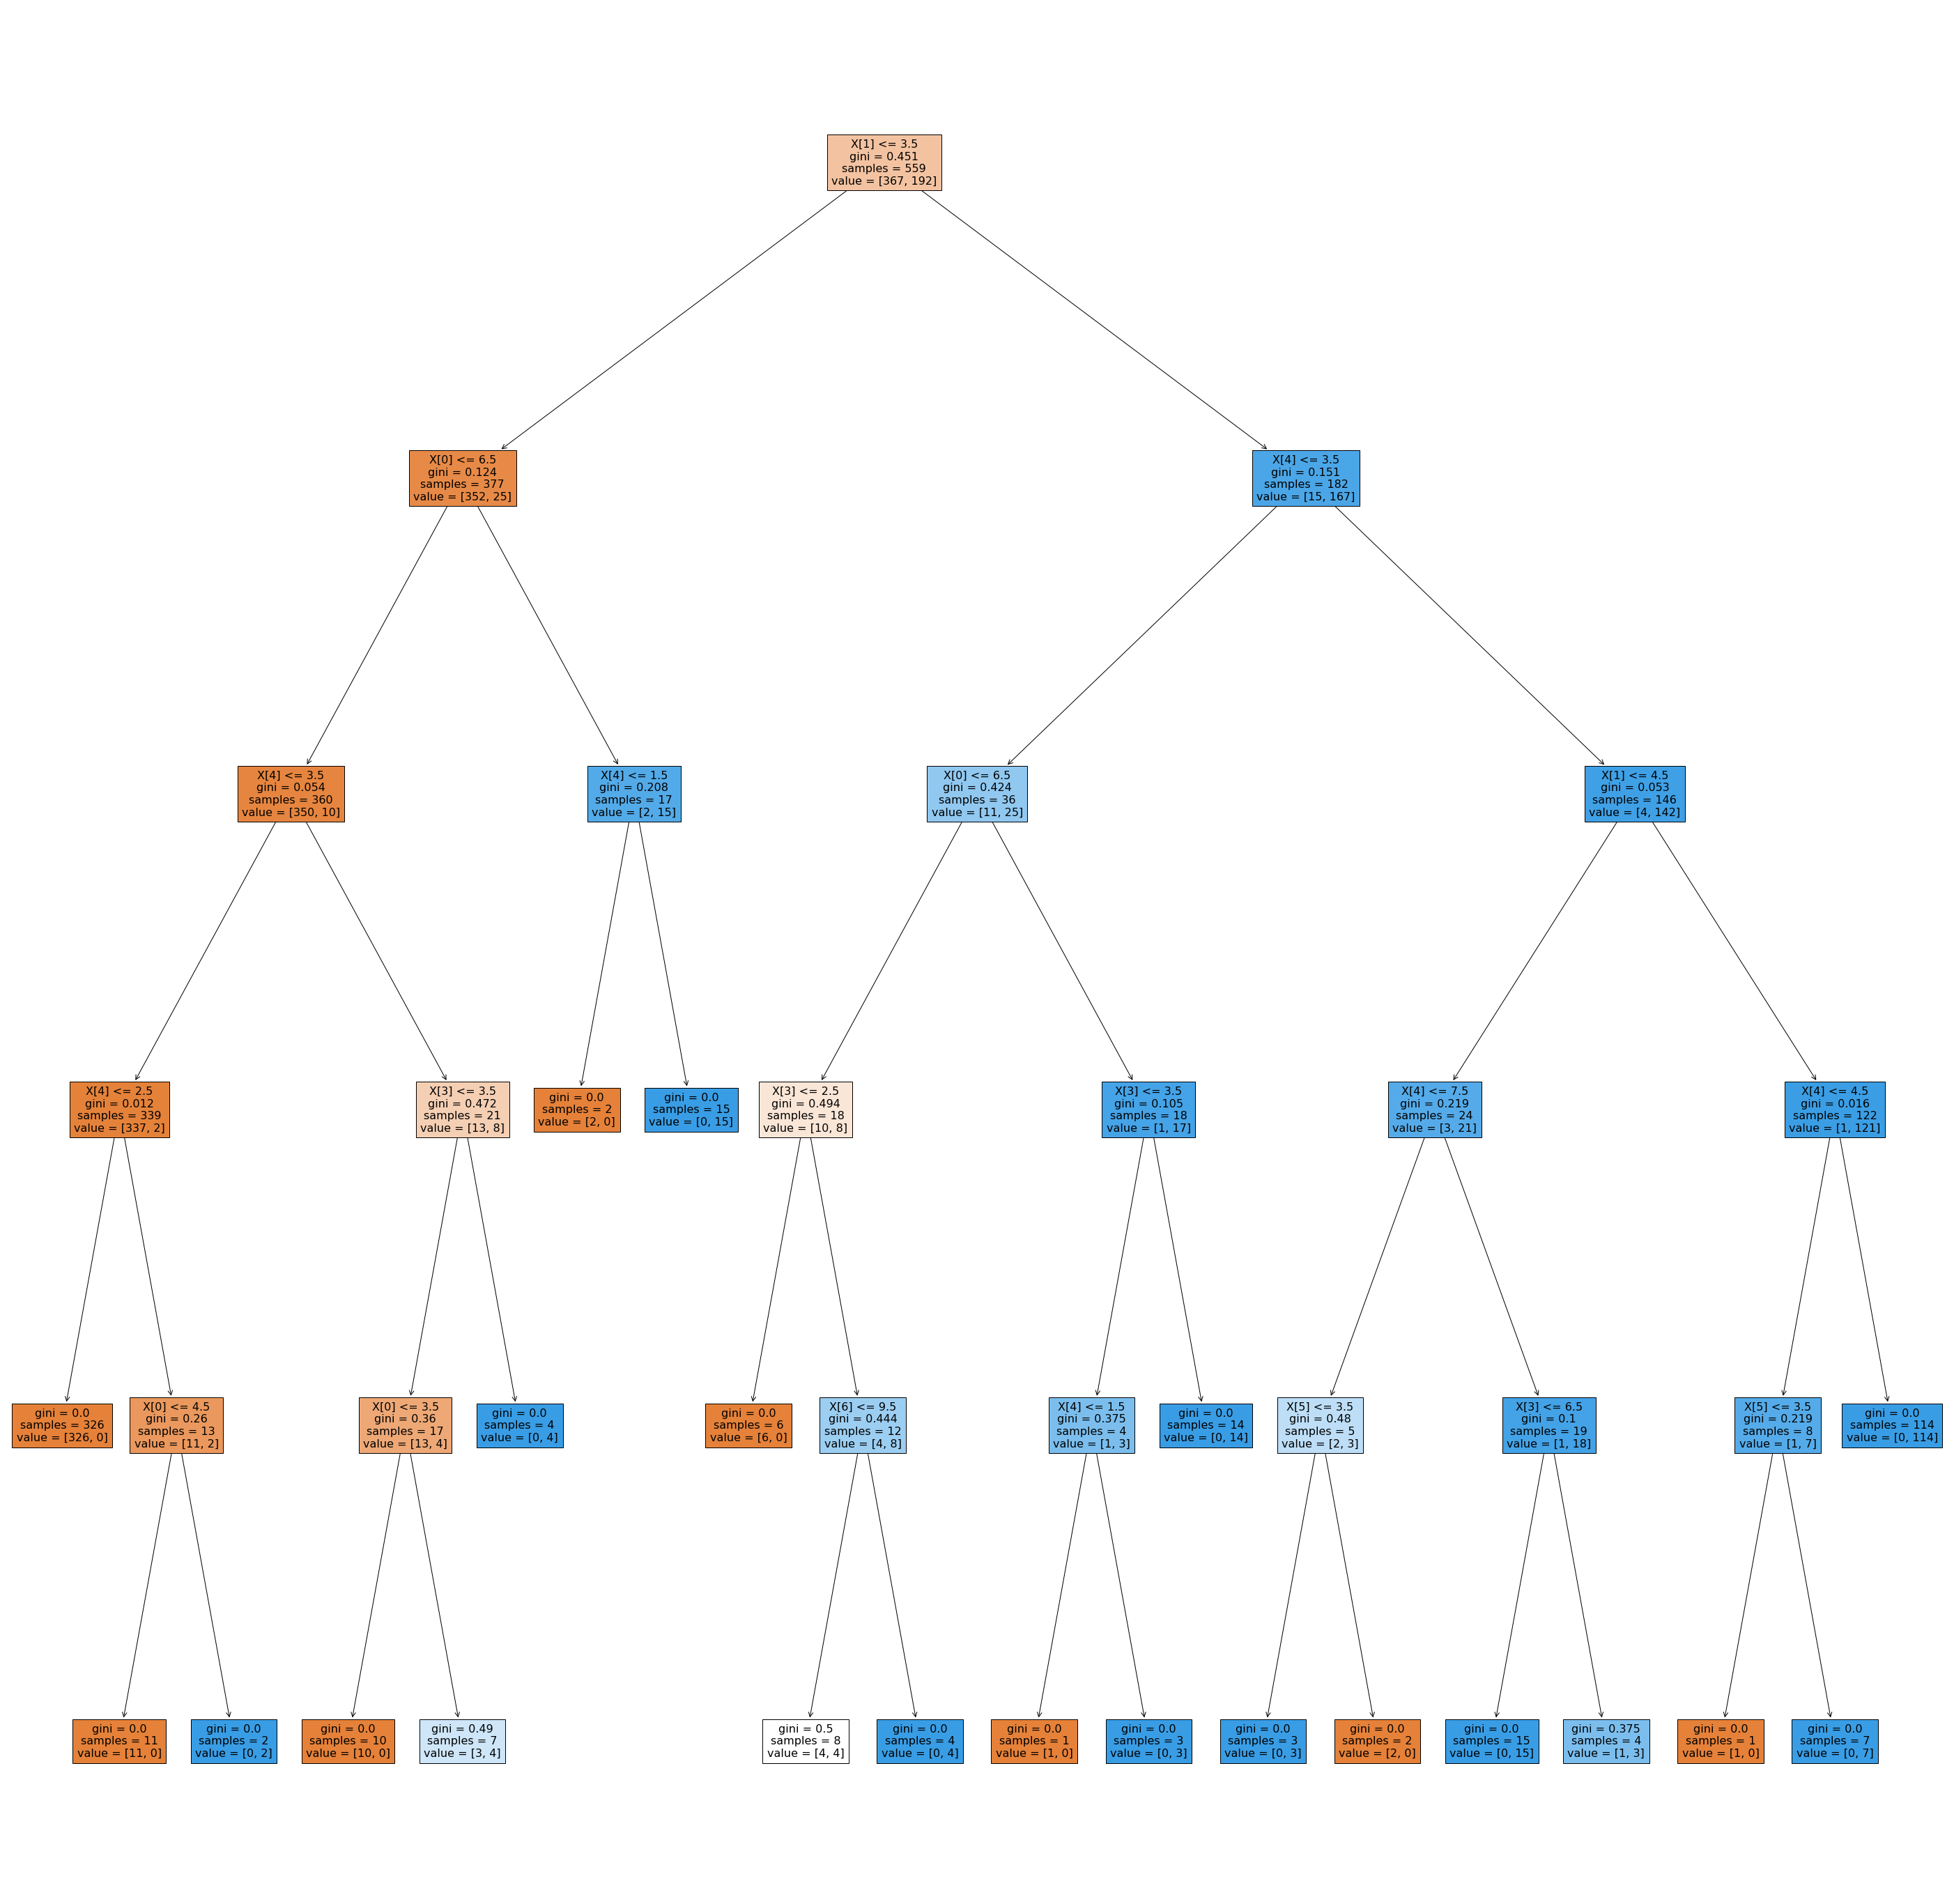

In [45]:
#Implementing the best tree decision algorithm
#this is the parametere for the best tree algorithm
clf_tree = tree.DecisionTreeClassifier(criterion = "gini",max_depth = 5)
clf_tree.fit(X_train, y_train)

plt.figure(figsize=(50,50))
tree.plot_tree(clf_tree,filled = True)
plt.savefig("tree.jpg")
plt.show()

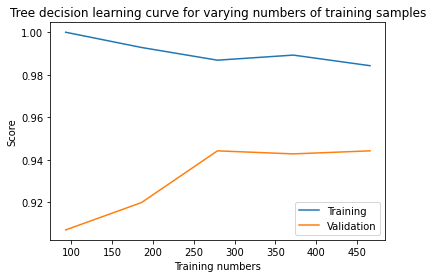

In [46]:
#The tree decision learning curve 
n,train_scores, val_scores = learning_curve(clf_tree, data.drop(columns = "Class"), data["Class"],
                                              train_sizes=np.linspace(0.2, 1, 5),cv=3)
plt.plot(n, train_scores.mean(axis=1), label='Training')
plt.plot(n, val_scores.mean(axis=1), label='Validation')
plt.legend()
plt.title("Tree decision learning curve for varying numbers of training samples")
plt.xlabel("Training numbers")
plt.ylabel("Score")
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score

Text(0.5, 15.0, 'Predicted label - Validation Data')

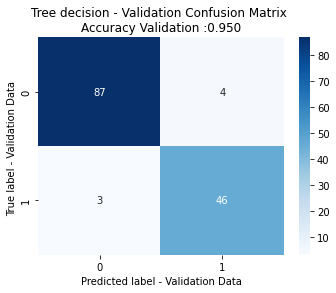

In [48]:
#Confusing matrix
tree_prediction = clf_tree.predict(X_test)

confusion_mc = confusion_matrix(y_test,tree_prediction)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,2)], columns = [i for i in range(0,2)])

plt.figure(figsize=(5.5,4))

sns.heatmap(df_cm, annot=True, cmap = "Blues",fmt='.3g')

plt.title('Tree decision - Validation Confusion Matrix \nAccuracy Validation :{0:.3f}'.format(accuracy_score(y_test, tree_prediction)))
plt.ylabel('True label - Validation Data ')
plt.xlabel('Predicted label - Validation Data')

In [49]:
#results 
print("Classification report : \n", clf_tree,"\n", metrics.classification_report(y_test, tree_prediction))

Classification report : 
 DecisionTreeClassifier(max_depth=5) 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        91
           1       0.92      0.94      0.93        49

    accuracy                           0.95       140
   macro avg       0.94      0.95      0.95       140
weighted avg       0.95      0.95      0.95       140



In [50]:
#Implementing the best k nearest neighbots algorithm
#this is the parametere for the best k nearest neighbots algorithm
n_neighbors = 3
clf_neighbors = neighbors.KNeighborsClassifier(n_neighbors, weights="distance")
clf_neighbors.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

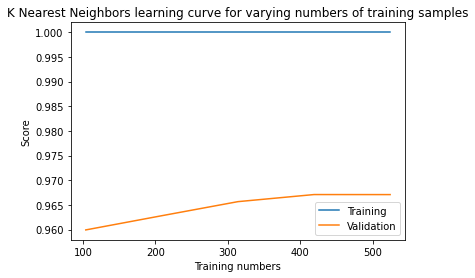

In [51]:
#The k nearest neighbors learning curve 
n,train_scores, val_scores = learning_curve(clf_neighbors, data.drop(columns = "Class"), data["Class"],
                                              train_sizes=np.linspace(0.2, 1, 5),cv=4)
plt.plot(n, train_scores.mean(axis=1), label='Training')
plt.plot(n, val_scores.mean(axis=1), label='Validation')
plt.legend()
plt.title("K Nearest Neighbors learning curve for varying numbers of training samples")
plt.xlabel("Training numbers")
plt.ylabel("Score")
plt.show()

Text(0.5, 15.0, 'Predicted label - Validation Data')

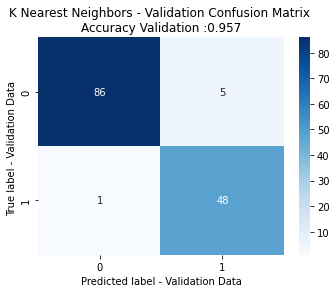

In [52]:
#Confusing matrix
knn_prediction = clf_neighbors.predict(X_test)

confusion_mc = confusion_matrix(y_test,knn_prediction)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,2)], columns = [i for i in range(0,2)])

plt.figure(figsize=(5.5,4))

sns.heatmap(df_cm, annot=True, cmap = "Blues",fmt='.3g')

plt.title('K Nearest Neighbors - Validation Confusion Matrix \nAccuracy Validation :{0:.3f}'.format(accuracy_score(y_test, knn_prediction)))
plt.ylabel('True label - Validation Data ')
plt.xlabel('Predicted label - Validation Data')

In [53]:
print("Classification report : \n", clf_neighbors,"\n", metrics.classification_report(y_test, knn_prediction))

Classification report : 
 KNeighborsClassifier(n_neighbors=3, weights='distance') 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97        91
           1       0.91      0.98      0.94        49

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140



In [54]:
#Implementing the best mlp algorithm
#this is the parameters for the best mlp performance
clf_mlp = MLPClassifier(solver='adam',learning_rate_init = 1e-3, alpha=1e-4,hidden_layer_sizes=(40,25),max_iter = 1000)
clf_mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(40, 25), max_iter=1000)

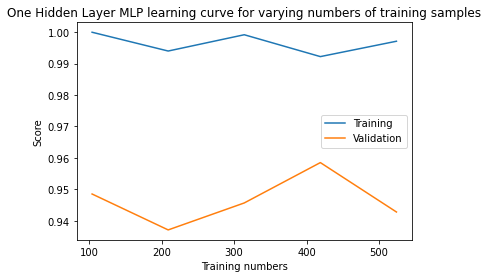

In [55]:
#The one hidden layer mlp learning curve 
n,train_scores, val_scores = learning_curve(clf_mlp, data.drop(columns = "Class"), data["Class"],
                                              train_sizes=np.linspace(0.2, 1, 5),cv=4)
plt.plot(n, train_scores.mean(axis=1), label='Training')
plt.plot(n, val_scores.mean(axis=1), label='Validation')
plt.legend()
plt.title("One Hidden Layer MLP learning curve for varying numbers of training samples")
plt.xlabel("Training numbers")
plt.ylabel("Score")
plt.show()

Text(0.5, 15.0, 'Predicted label - Training Data')

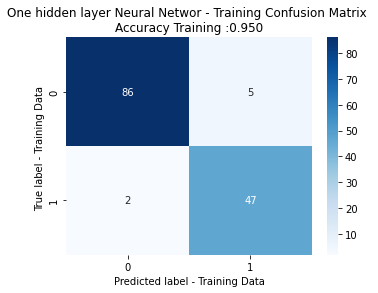

In [56]:
#Confusing matrix
mlp_prediction = clf_mlp.predict(X_test)

confusion_mc = confusion_matrix(y_test,mlp_prediction)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,2)], columns = [i for i in range(0,2)])

plt.figure(figsize=(5.5,4))

sns.heatmap(df_cm, annot=True, cmap = "Blues",fmt='.3g')

plt.title('One hidden layer Neural Networ - Training Confusion Matrix \nAccuracy Training :{0:.3f}'.format(accuracy_score(y_test, mlp_prediction)))
plt.ylabel('True label - Training Data ')
plt.xlabel('Predicted label - Training Data')


In [57]:
#results 
print("Classification report : \n", clf_mlp,"\n", metrics.classification_report(y_test, mlp_prediction))

Classification report : 
 MLPClassifier(hidden_layer_sizes=(40, 25), max_iter=1000) 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        91
           1       0.90      0.96      0.93        49

    accuracy                           0.95       140
   macro avg       0.94      0.95      0.95       140
weighted avg       0.95      0.95      0.95       140



In [58]:
#Implementing the best mlp algorithm
#this is the parameters for the best mlp performance
clf_svm = SVC(kernel = "rbf", C=1)
clf_svm.fit(X_train,y_train)

SVC(C=1)

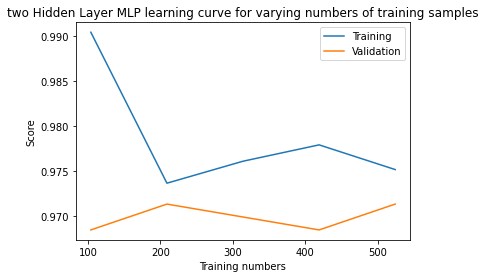

In [59]:

n,train_scores, val_scores = learning_curve(clf_svm, data.drop(columns = "Class"), data["Class"],
                                              train_sizes=np.linspace(0.2, 1, 5),cv=4)
plt.plot(n, train_scores.mean(axis=1), label='Training')
plt.plot(n, val_scores.mean(axis=1), label='Validation')
plt.legend()
plt.title("two Hidden Layer MLP learning curve for varying numbers of training samples")
plt.xlabel("Training numbers")
plt.ylabel("Score")
plt.show()

Text(0.5, 15.0, 'Predicted label - Training Data')

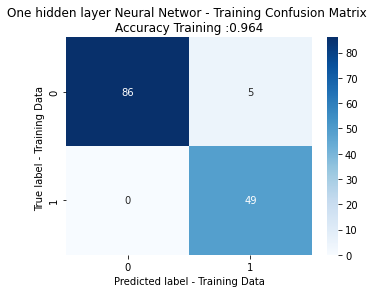

In [60]:
#Confusing matrix
svm_prediction = clf_svm.predict(X_test)

confusion_mc = confusion_matrix(y_test,svm_prediction)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,2)], columns = [i for i in range(0,2)])

plt.figure(figsize=(5.5,4))

sns.heatmap(df_cm, annot=True, cmap = "Blues",fmt='.3g')

plt.title('One hidden layer Neural Networ - Training Confusion Matrix \nAccuracy Training :{0:.3f}'.format(accuracy_score(y_test, svm_prediction)))
plt.ylabel('True label - Training Data ')
plt.xlabel('Predicted label - Training Data')

In [61]:
#results 
print("Classification report : \n", clf_svm,"\n", metrics.classification_report(y_test, svm_prediction))

Classification report : 
 SVC(C=1) 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        91
           1       0.91      1.00      0.95        49

    accuracy                           0.96       140
   macro avg       0.95      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140



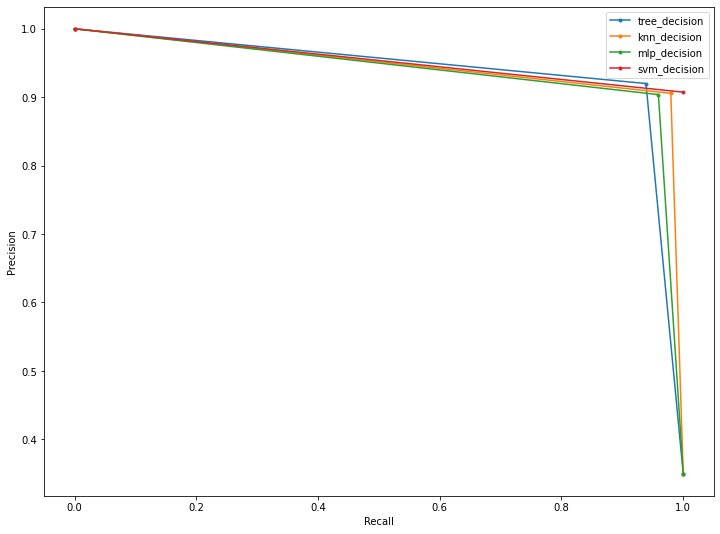

In [62]:
from sklearn.metrics import precision_recall_curve,roc_curve, auc


tree_precision,tree_recall,_ = precision_recall_curve(y_test,tree_prediction)

knn_precision,knn_recall,_ = precision_recall_curve(y_test,knn_prediction)

mlp_precision,mlp_recall,_ = precision_recall_curve(y_test,mlp_prediction)

svm_precision,svm_recall,_ = precision_recall_curve(y_test,svm_prediction)

plt.figure(figsize=(12,9))
plt.plot(tree_recall, tree_precision, marker='.', label='tree_decision')
plt.plot(knn_recall, knn_precision, marker='.', label='knn_decision')
plt.plot(mlp_recall, mlp_precision, marker='.', label='mlp_decision')
plt.plot(svm_recall, svm_precision, marker='.', label='svm_decision')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

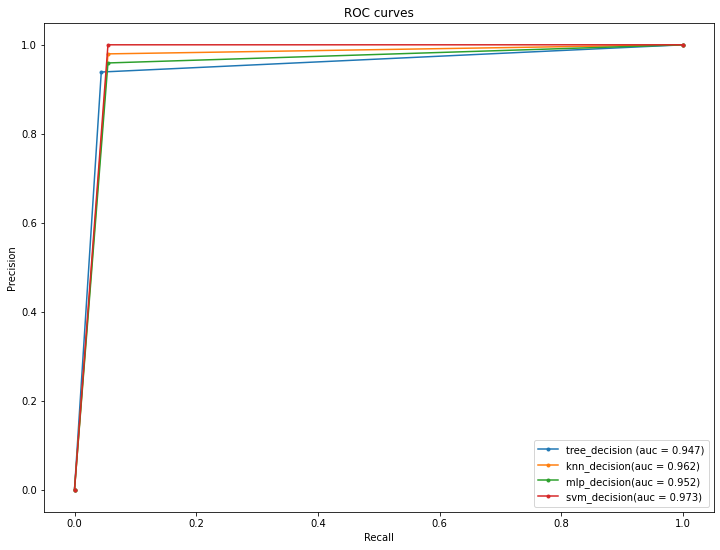

In [63]:
#we used the prediction from the previous because it's tha same
tree_fpr,tree_tpr,_ = roc_curve(y_test,tree_prediction)
knn_fpr,knn_tpr,_ = roc_curve(y_test,knn_prediction)
mlp_fpr,mlp_tpr,_ = roc_curve(y_test,mlp_prediction)
svm_fpr,svm_tpr,_ = roc_curve(y_test,svm_prediction)


tree_auc = auc(tree_fpr,tree_tpr)
knn_auc = auc(knn_fpr,knn_tpr)
mlp_auc = auc(mlp_fpr,mlp_tpr)
svm_auc = auc(svm_fpr,svm_tpr)

plt.figure(figsize=(12,9))
plt.plot(tree_fpr, tree_tpr, marker='.', label='tree_decision (auc = %0.3f)' % tree_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn_decision(auc = %0.3f)' % knn_auc)
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='mlp_decision(auc = %0.3f)' % mlp_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='svm_decision(auc = %0.3f)' %svm_auc)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('ROC curves')
# show the legend
plt.legend()
# show the plot
plt.show()